In [20]:
import pandas as pd
from wordcloud import WordCloud

In [33]:
data = pd.read_csv("kindle_reviews.csv")

In [34]:
data.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200


In [35]:
data['overall'].value_counts()

overall
5    575264
4    254013
3     96194
2     34130
1     23018
Name: count, dtype: int64

In [36]:
data['Time'] = pd.to_datetime(data['unixReviewTime'])

In [37]:
data.head(1)

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Time
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000,1970-01-01 00:00:01.399248


In [38]:
data.drop("Unnamed: 0", axis=1)

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Time
0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000,1970-01-01 00:00:01.399248000
1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400,1970-01-01 00:00:01.388966400
2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600,1970-01-01 00:00:01.396569600
3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000,1970-01-01 00:00:01.392768000
4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200,1970-01-01 00:00:01.395187200
...,...,...,...,...,...,...,...,...,...,...
982614,B00M13FNSS,"[2, 2]",5,Yasss hunny! This is a great read. That Dre is...,"07 23, 2014",A2Y66HD4J5S7QZ,Candi,A Hot Read Indeed!!,1406073600,1970-01-01 00:00:01.406073600
982615,B00M13FNSS,"[0, 0]",5,I ENJOYED THIS BOOK FROM BEGINNING TO END NOW ...,"07 23, 2014",A17YHECC8H9NEY,Margie,VERY GOOD BOOK,1406073600,1970-01-01 00:00:01.406073600
982616,B00M13FNSS,"[1, 1]",5,Great book! Cherika was a fool. She let that m...,"07 23, 2014",A20KO0BPMNREJL,Nicki,Great Read,1406073600,1970-01-01 00:00:01.406073600
982617,B00M13FNSS,"[0, 0]",5,When I say this was an excellent book please b...,"07 23, 2014",A1BQO66R6OLCCW,Nikey,Wow!!,1406073600,1970-01-01 00:00:01.406073600


In [8]:
data.shape

(982619, 11)

In [9]:
data.dtypes

Unnamed: 0                 int64
asin                      object
helpful                   object
overall                    int64
reviewText                object
reviewTime                object
reviewerID                object
reviewerName              object
summary                   object
unixReviewTime             int64
Time              datetime64[ns]
dtype: object

In [10]:
data.isnull().sum()

Unnamed: 0           0
asin                 0
helpful              0
overall              0
reviewText          22
reviewTime           0
reviewerID           0
reviewerName      3822
summary            119
unixReviewTime       0
Time                 0
dtype: int64

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

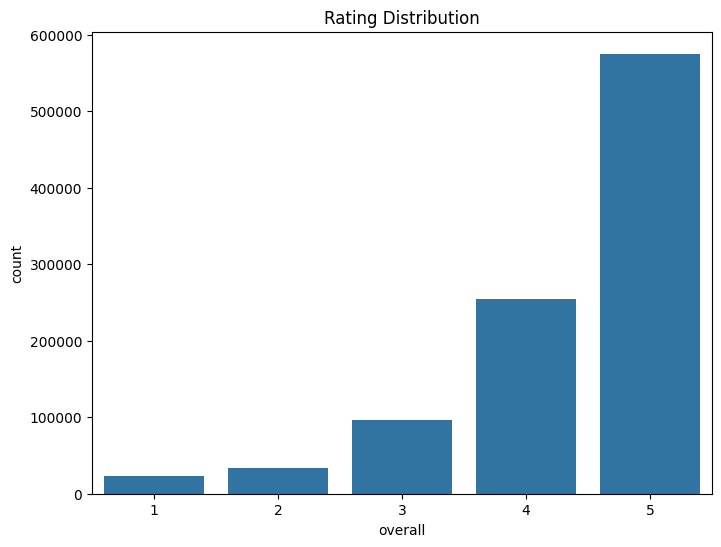

In [40]:
plt.figure(figsize=(8,6))
sns.countplot(data, x='overall', order=sorted(data['overall'].unique()))
plt.title("Rating Distribution")
plt.show()

In [41]:
data['review_length_words'] = data['reviewText'].astype(str).apply(lambda x: len(x.split()))
data['review_length_chars'] = data['reviewText'].astype(str).apply(len)

In [42]:
len(data.reviewText[0].split())

53

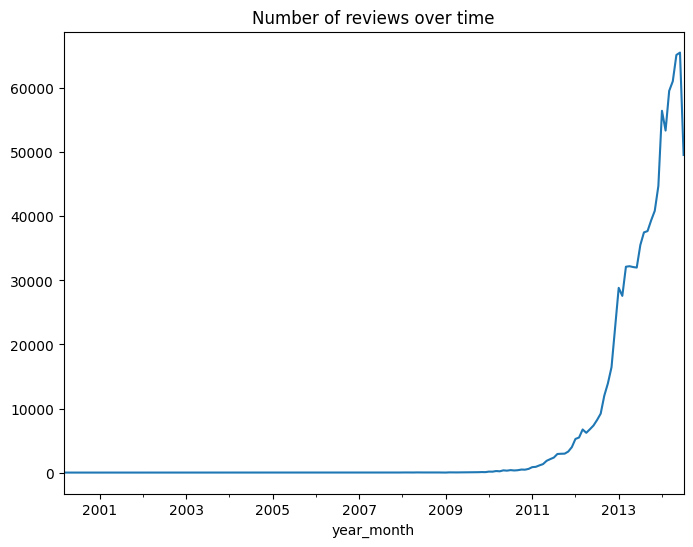

In [43]:
if 'unixReviewTime' in data.columns:
    data['ReviewTime'] = pd.to_datetime(data['unixReviewTime'], unit='s')
    data['year_month'] = data['ReviewTime'].dt.to_period('M')
    plt.figure(figsize=(8,6))
    data.groupby("year_month").size().plot()
    plt.title("Number of reviews over time")
    plt.show()

In [44]:
def map_sentiment(rating):
    if rating <= 2:
        return "negative"
    elif rating == 3:
        return "neutral"
    else:
        return "positive"

data["sentiment"] = data.overall.apply(map_sentiment)
data.sentiment.value_counts()

sentiment
positive    829277
neutral      96194
negative     57148
Name: count, dtype: int64

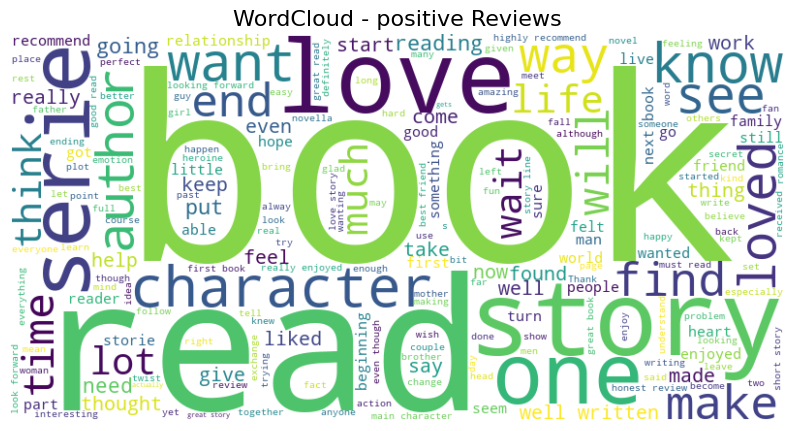

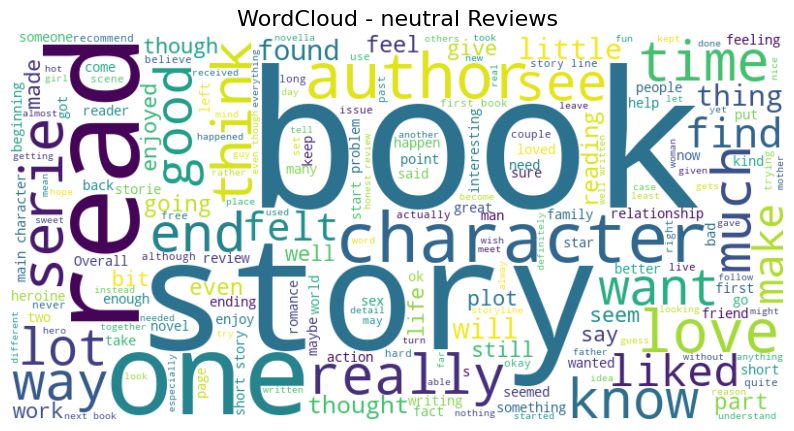

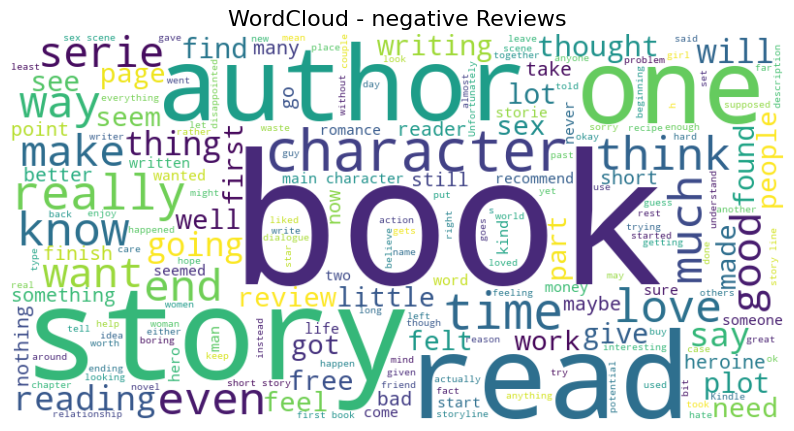

In [21]:
def word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color="white",).generate(" ".join(text))
    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()

for sentiment in data['sentiment'].unique():
    subset = data[data['sentiment'] == sentiment]
    word_cloud(subset['reviewText'].astype(str), f"WordCloud - {sentiment} Reviews")

In [50]:
data = data[['reviewText','overall']]
data.head()

,reviewText,overall
0,I enjoy vintage books and movies so I enjoyed ...,5
1,This book is a reissue of an old one; the auth...,4
2,This was a fairly interesting read. It had ol...,4
3,I'd never read any of the Amy Brewster mysteri...,5
4,"If you like period pieces - clothing, lingo, y...",4


In [51]:
data.isnull().sum()

reviewText    0
overall       0
dtype: int64

In [47]:
data.dropna(axis=0, inplace=True)

In [54]:
data['overall'].value_counts()

overall
5    575246
4    254010
3     96193
2     34130
1     23018
Name: count, dtype: int64

In [63]:
data['rating'] = data['overall'].apply(lambda x: 1 if x>=3 else 0)

In [66]:
data.rating.value_counts()

rating
1    925449
0     57148
Name: count, dtype: int64

In [68]:
data.to_csv('review-data.csv', index=False)